In [26]:
from rdkit import Chem
from mordred import Calculator, descriptors
from mordred import WienerIndex, ZagrebIndex
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
calc = Calculator(descriptors, ignore_3D=True)
# how many descriptors in library
len(calc.descriptors)

1613

In [11]:
pentane = Chem.MolFromSmiles('CCCCC')
methyl_pentane = Chem.MolFromSmiles('CCCC(C)C')

wiener_index = WienerIndex.WienerIndex()

result1 = wiener_index(pentane)
result2 = wiener_index(methyl_pentane)

print('the wiener index for n-pentane is :', result1)
print('the wiener index for 2-methylpentane is:', result2)

the wiener index for n-pentane is : 20
the wiener index for 2-methylpentane is: 32


In [14]:
zagreb_index1 = ZagrebIndex.ZagrebIndex(version=1)
zagreb_index2 = ZagrebIndex.ZagrebIndex(version=2)

result_Z1 = zagreb_index1(pentane)
result_Z2 = zagreb_index2(pentane)
print('The zagreb index 1 for n-pentane is:', result_Z1)
print('The zagreb index 2 for n-pentane is:', result_Z2)

print()
result_Z1 = zagreb_index1(methyl_pentane)
result_Z2 = zagreb_index2(methyl_pentane)
print('The zagreb index 1 for methyl-pentane is:', result_Z1)
print('The zagreb index 2 for methyl-pentane is:', result_Z2)

The zagreb index 1 for n-pentane is: 14.0
The zagreb index 2 for n-pentane is: 12.0

The zagreb index 1 for methyl-pentane is: 20.0
The zagreb index 2 for methyl-pentane is: 18.0


In [15]:
smiles = ['CCC', 'CCCC', 'CCCCC', 'CCCC(C)C', 'CC(C)C(C)C']

for smile in smiles:
    mol = Chem.MolFromSmiles(smile)
    result_Z1 = zagreb_index1(mol)
    result_Z2 = zagreb_index2(mol)
    
    print('the zagreb index 1 for {} is {}'.format(smile, result_Z1))
    print('the zagreb index 2 for {} is {}'.format(smile, result_Z2))
    print()
    

the zagreb index 1 for CCC is 6.0
the zagreb index 2 for CCC is 4.0

the zagreb index 1 for CCCC is 10.0
the zagreb index 2 for CCCC is 8.0

the zagreb index 1 for CCCCC is 14.0
the zagreb index 2 for CCCCC is 12.0

the zagreb index 1 for CCCC(C)C is 20.0
the zagreb index 2 for CCCC(C)C is 18.0

the zagreb index 1 for CC(C)C(C)C is 22.0
the zagreb index 2 for CC(C)C(C)C is 21.0



In [17]:
df = pd.read_csv('BP.csv')
df.head()

,compound,name,BP_C,BP_K,SMILES,MW
0,1,Methane,-162.2,110.95,C,16.043
1,2,Ethane,-88.6,184.55,CC,30.070
2,3,propane,-42.2,230.95,CCC,44.100
3,4,butane,-0.1,273.05,CCCC,58.120
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120


Text(0, 0.5, 'Boiling Point (K)')

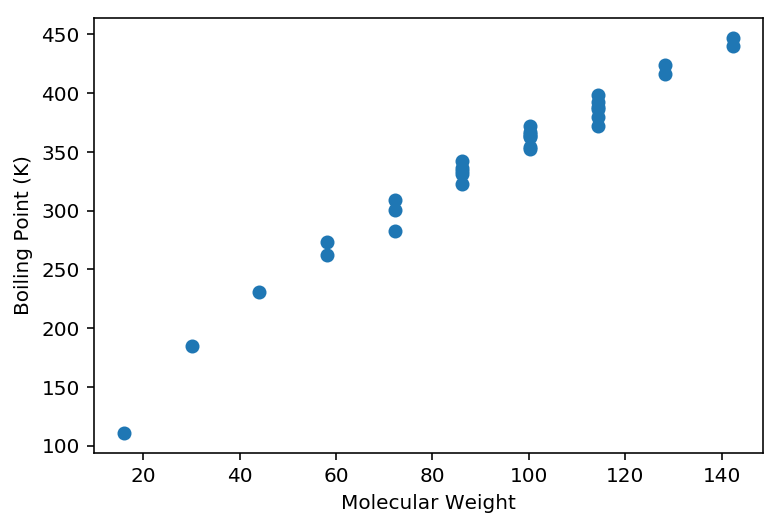

In [19]:
plt.scatter(df['MW'], df['BP_K'])
plt.xlabel('Molecular Weight')
plt.ylabel('Boiling Point (K)')

In [21]:
result_wiener = []
result_z1 = []
result_z2 = []

for index, row in df.iterrows():
    smile = row['SMILES']
    mol = Chem.MolFromSmiles(smile)
    result_wiener.append(wiener_index(mol))
    result_z1.append(zagreb_index1(mol))
    result_z2.append(zagreb_index2(mol))
    
df['wiener'] = result_wiener
df['z1'] = result_z1
df['z2'] = result_z2

In [22]:
df.head()

,compound,name,BP_C,BP_K,SMILES,MW,wiener,z1,z2
0,1,Methane,-162.2,110.95,C,16.043,0,0.0,0.0
1,2,Ethane,-88.6,184.55,CC,30.070,1,2.0,1.0
2,3,propane,-42.2,230.95,CCC,44.100,4,6.0,4.0
3,4,butane,-0.1,273.05,CCCC,58.120,10,10.0,8.0
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120,9,12.0,9.0


Text(0, 0.5, 'Boiling Point (K)')

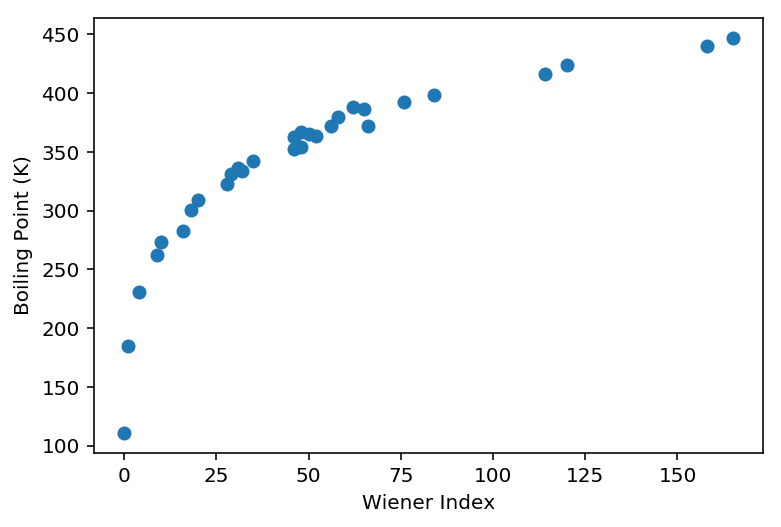

In [23]:
plt.scatter(df['wiener'], df['BP_K'])
plt.xlabel('Wiener Index')
plt.ylabel('Boiling Point (K)')

Text(0, 0.5, 'Boiling Point (K)')

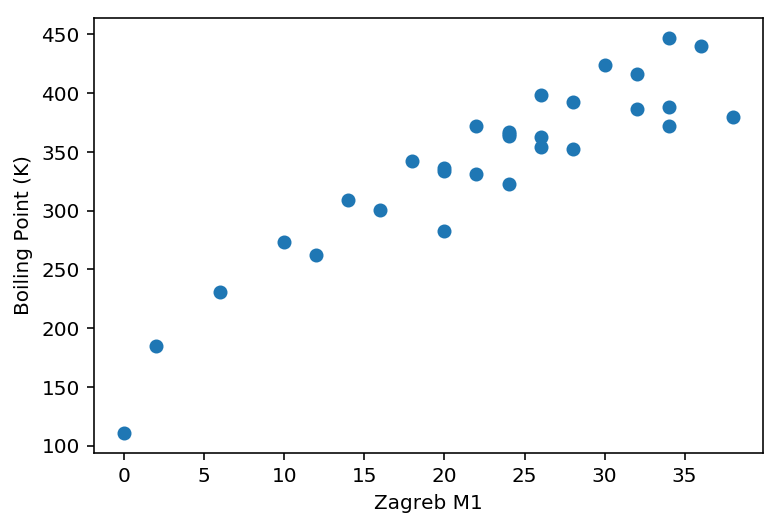

In [24]:
plt.scatter(df['z1'], df['BP_K'])
plt.xlabel('Zagreb M1')
plt.ylabel('Boiling Point (K)')

Text(0, 0.5, 'Boiling Point (K)')

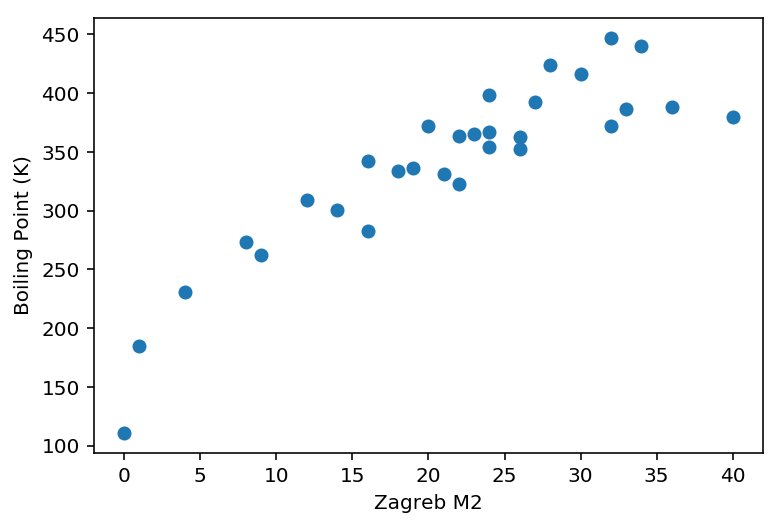

In [25]:
plt.scatter(df['z2'], df['BP_K'])
plt.xlabel('Zagreb M2')
plt.ylabel('Boiling Point (K)')

In [29]:
# select independent vars
x = df[['MW', 'wiener', 'z1', 'z2']]
# add intercept
x = sm.add_constant(x)

# dependent var
y = df['BP_K']

# setup model and make preds
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   BP_K   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1124.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.16e-28
Time:                        20:40:43   Log-Likelihood:                -93.019
No. Observations:                  30   AIC:                             196.0
Df Residuals:                      25   BIC:                             203.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.5695      6.745      8.238      0.0

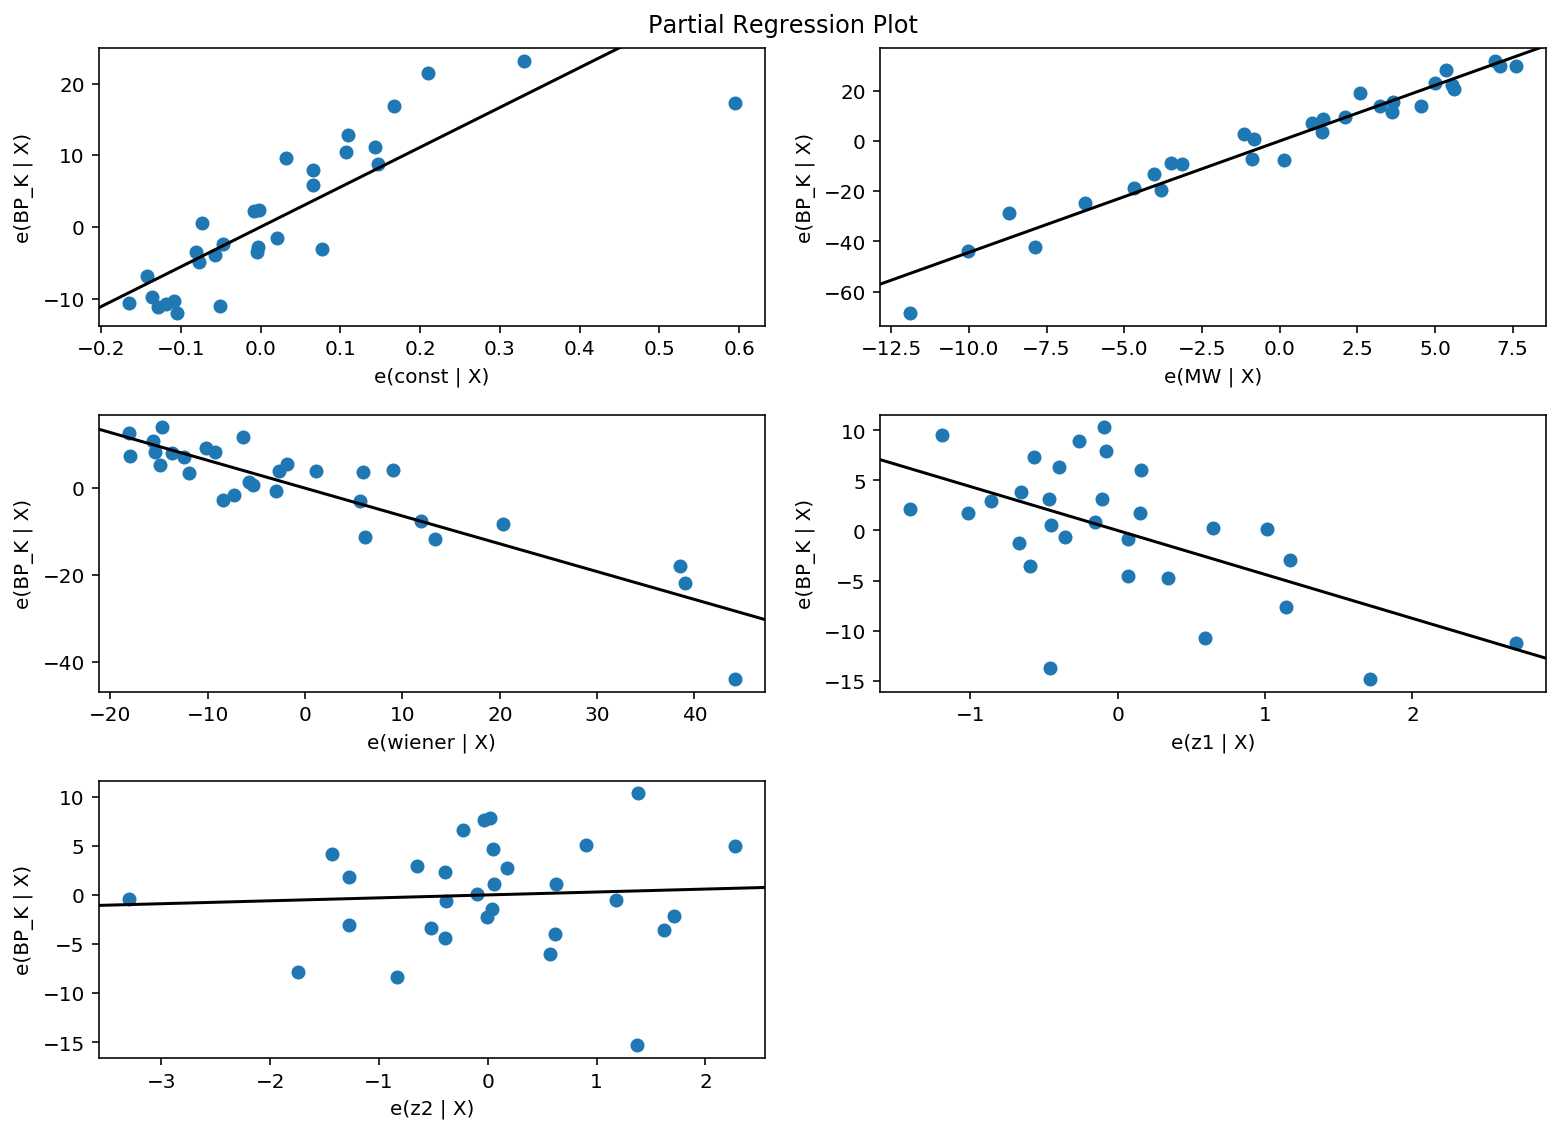

In [31]:
fig = plt.figure(figsize=(11, 8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.213e+05
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.52e-54
Time:                        20:43:15   Log-Likelihood:                -93.015
No. Observations:                  30   AIC:                             188.0
Df Residuals:                      29   BIC:                             189.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BP_K           0.9998      0.003    348.263      0.0

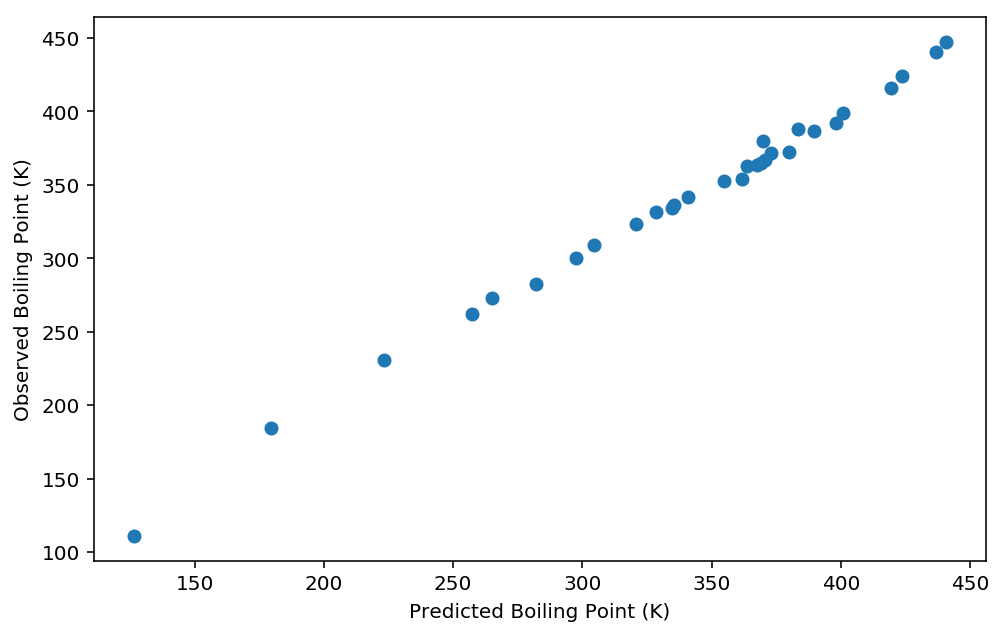

In [33]:
pred_bp = model.fittedvalues.copy()

fig, ax = plt.subplots(figsize=(8, 5))

# compare pred to true
lmod = sm.OLS(pred_bp, df['BP_K'])
res = lmod.fit()

plt.scatter(pred_bp, df['BP_K'])
plt.xlabel('Predicted Boiling Point (K)')
plt.ylabel('Observed Boiling Point (K)')

print(res.summary())

In [34]:
# redo without z2

x = df[['MW', 'wiener', 'z1']]
x = sm.add_constant(x)
y = df['BP_K']

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   BP_K   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1552.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.99e-29
Time:                        20:44:36   Log-Likelihood:                -93.078
No. Observations:                  30   AIC:                             194.2
Df Residuals:                      26   BIC:                             199.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.4979      6.624      8.378      0.0